In [47]:
api_key = "14L0MwGavn2XZNhKf8A8ojstu"
api_key_secret = "UkzpPJcvVsk1DEndpkM75j4nVXoZmrMjefj3jKNyH6FDrEKzJV"
access_token = "1546836595130630145-C387ONFblGumqJAR3044IsHAIcu3tO"
access_token_secret = "RpfhbxLzIlEqFXg5StshkAVDveT9B0LyGEVz5hkf6OmoP"

In [48]:
import tweepy as tw
auth = tw.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

In [49]:
# Define the query
search_query = "#pinguinitatticinucleari"
tweets = tw.Cursor(api.search_tweets,
              q=search_query,
              lang="it",
              since="2022-07-13").items(100)

In [50]:
# Retreive the tweets
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


Total Tweets fetched: 100


In [51]:
# Populate the dataset
import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

C:\Users\massi\AppData\Local\Temp\ipykernel_13152\1445611538.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,


In [52]:
tweets_df.head() # show the dataframe

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,Bijou,,,False,2022-07-13 18:50:49+00:00,Colpa “vostra” che fate credere al primo sfiga...,None,Twitter for iPhone
1,Aurora Di Pietro,,✨little girl che ama seguire il trash✨,False,2022-07-13 18:45:32+00:00,"RT @therougefennel: PTN: ""Gli uomini, sai, son...",None,Twitter for iPhone
2,👑,,commento cose a caso,False,2022-07-13 18:43:30+00:00,RT @giovannyna3: In un mondo di Paki e di Rhov...,[pinguinitatticinucleari],Twitter for iPhone
3,I THINK I THINK TOO MUCH,,come back stronger than a '90s trend,False,2022-07-13 18:40:13+00:00,RT @abcdeufuckU: SINGORI E SIGNORE \nI PINGUIN...,[pinguinitatticinucleari],Twitter for iPhone
4,I THINK I THINK TOO MUCH,,come back stronger than a '90s trend,False,2022-07-13 18:40:11+00:00,RT @_mariells: Quando dite che i Pinguini cerc...,None,Twitter for iPhone


In [53]:
# Drop duplicates
tweets_df.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)
print(f"all tweets: {tweets_df.shape}") # 4 duplicates 

all tweets: (96, 8)


In [57]:
# Clean Text
import numpy as np
import re
from nltk.corpus import stopwords
stopwords = stopwords.words('italian')
def clean_tweet(tweet):
    if type(tweet) == np.float_:
        return ""
    temp = tweet.lower()         # trasforma tutte le parole dei tweet in minuscolo
    temp = re.sub("'", "", temp) 
    temp = re.sub("@[A-Za-z0-9_]+","", temp) # Rimuove le menzioni
    temp = re.sub("#[A-Za-z0-9_]+","", temp) # Rimuove gli #
    temp = re.sub(r'http\S+', '', temp)      # Rimuove i link
    temp = re.sub('[()!?]', ' ', temp)       # Rimuove la punteggiatura
    temp = re.sub('\[.*?\]',' ', temp)       # Rimuove la punteggiatura
    temp = re.sub("[^a-z0-9]"," ", temp)     # Rimuove i caratteri non alfanumerici
    temp = temp.split()                      
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

tweets = []
for word in tweets_df.text:
    tweets.append(word)

results = [clean_tweet(tw) for tw in tweets]

In [58]:
results

['colpa fate credere primo sfigato cazzo canzoncina orecchiabile essere michael jackson mooolto meno sfigato',
 'rt ptn uomini sai animali strani diceva nonna grado dimenticarsi olocausti qu',
 'rt mondo paki rhove ringo starr',
 'rt singori signore pinguini tattici nucleari',
 'rt quando dite pinguini cercano hype dimenticate testi pastello bianco ridere sinceramente minim',
 'rt comunque rhove ringrazierei ptn averlo reso famoso almeno 90 italiani fino stamattina',
 'rt bacchetta cantanti insultano proprio pubblico perch partecipano abb',
 'rt bacchetta cantanti insultano proprio pubblico perch partecipano abb',
 'rt bacchetta cantanti insultano proprio pubblico perch partecipano abb',
 'rt singori signore pinguini tattici nucleari',
 'cardiotrap gemma',
 'cardiotrap gemma',
 'cardiotrap gemma',
 'cardiotrap gemma',
 'cardiotrap gemma',
 'rt bacchetta cantanti insultano proprio pubblico perch partecipano abb',
 'cardiotrap gemma',
 'cardiotrap gemma',
 'cardiotrap gemma',
 'cardiotra

In [59]:
# Polarity
from textblob import TextBlob

In [66]:
TextBlob("I'm very happy").sentiment # example

Sentiment(polarity=1.0, subjectivity=1.0)

In [65]:
TextBlob('I love horror film').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [67]:
TextBlob("I'm sad").sentiment

Sentiment(polarity=-0.5, subjectivity=1.0)

In [68]:
def getSubjectivity(text):
    
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    
        return TextBlob(text).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [69]:
data_frame_text = pd.DataFrame(results)
data_frame_text.columns = ['Text']

In [70]:
data_frame_text

,Text
0,colpa fate credere primo sfigato cazzo canzonc...
1,rt ptn uomini sai animali strani diceva nonna ...
2,rt mondo paki rhove ringo starr
3,rt singori signore pinguini tattici nucleari
4,rt quando dite pinguini cercano hype dimentica...
...,...
91,rt storia artista dovrebbe sapere proprio mest...
92,rapper interrompe concerto insulta pubblico sa...
93,rt singori signore pinguini tattici nucleari
94,riportatemi 4 luglio


In [71]:
data_frame_text['Subjectivity'] = data_frame_text['Text'].apply(getSubjectivity) 

data_frame_text['Polarity'] = data_frame_text['Text'].apply(getPolarity) 

data_frame_text['Analysis'] = data_frame_text['Polarity'].apply(analysis)

In [72]:
data_frame_text.head() 

,Text,Subjectivity,Polarity,Analysis
0,colpa fate credere primo sfigato cazzo canzonc...,0.0,0.0,Neutral
1,rt ptn uomini sai animali strani diceva nonna ...,0.0,0.0,Neutral
2,rt mondo paki rhove ringo starr,0.0,0.0,Neutral
3,rt singori signore pinguini tattici nucleari,0.0,0.0,Neutral
4,rt quando dite pinguini cercano hype dimentica...,0.0,0.0,Neutral


In [73]:
data_frame_text.Analysis.value_counts()

Neutral     94
Positive     2
Name: Analysis, dtype: int64

In [105]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

def visualize_word_freq(input_data,max_words,title_pre,tfidf=False):
   
    plt.style.use("ggplot")
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['figure.figsize'] = (20.0, 5.0)
    plt.rcParams['xtick.labelsize'] = 22
    
    if tfidf:
        vectorizer = TfidfVectorizer(max_features=max_words, min_df=5, max_df=0.7, use_idf=True)
        TITLE = title_pre+" - "+"(TFIDF)"
    else:
        vectorizer = CountVectorizer(max_features=max_words, min_df=5, max_df=0.7)
        TITLE = title_pre
        
    mat = vectorizer.fit_transform(input_data)
    
    pd.DataFrame(mat.sum(axis=0).T,
             index=vectorizer.get_feature_names_out(),
             columns=['freq']).sort_values(by='freq',
                                           ascending=False).plot(kind='bar',title=TITLE)

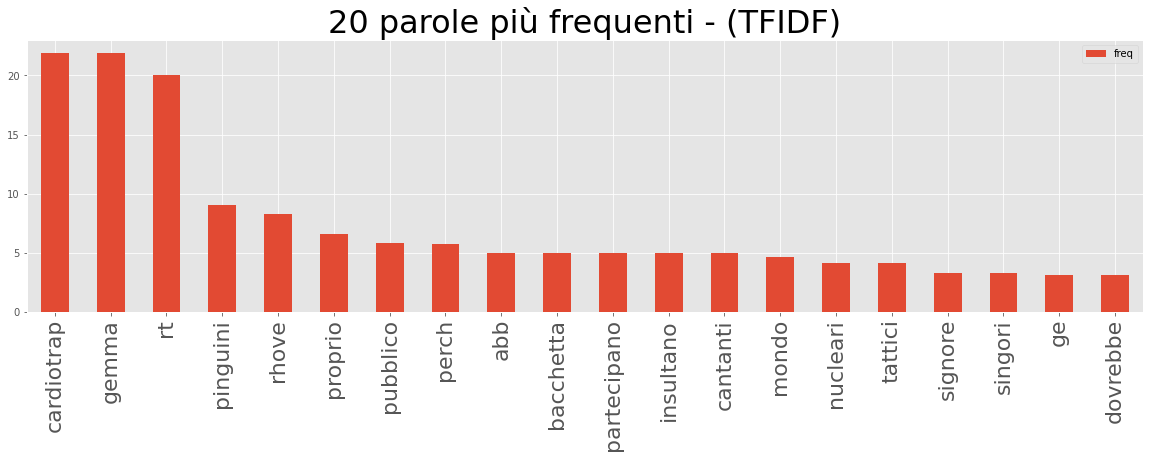

In [116]:
visualize_word_freq(results, 20, "20 parole più frequenti", True)

In [117]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white', 
        max_words=20,
        max_font_size=40, 
        scale=3,
        random_state=1,
        collocations=False
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

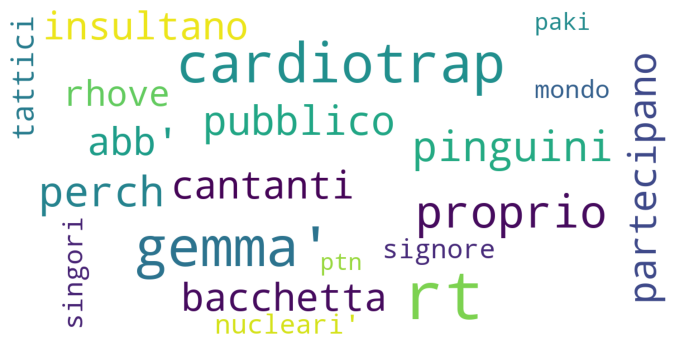

In [107]:
show_wordcloud(results)